In [91]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
import json
from pprint import pprint
from scipy import stats
import gzip

from tqdm.auto import tqdm

import matplotlib.pyplot as plt

from yahist import Hist1D,Hist2D
from dask.distributed import Client
import dask.dataframe as dd

from scipy.interpolate import interp1d

In [2]:
pd.options.display.max_colwidth = -1
# https://www.fhwa.dot.gov/publications/research/operations/07030/index.cfm
# location_map = {'i-80': 0, 'lankershim': 1, 'peachtree': 2, 'us-101': 3}
pd.read_json("meta.json.gz").query("position>=1").drop(["name","id","renderTypeName","format","flags","tableColumnId","width","cachedContents"],axis=1)

,dataTypeName,fieldName,position,description
8,number,vehicle_id,1,Vehicle identification number (ascending by time of entry into section). REPEATS ARE NOT ASSOCIATED.
9,number,frame_id,2,Frame Identification number (ascending by start time)
10,number,total_frames,3,Total number of frames in which the vehicle appears in this data set
11,number,global_time,4,"Elapsed time in milliseconds since Jan 1, 1970."
12,number,local_x,5,Lateral (X) coordinate of the front center of the vehicle in feet with respect to\nthe left-most edge of the section in the direction of travel.
13,number,local_y,6,Longitudinal (Y) coordinate of the front center of the vehicle in feet with\nrespect to the entry edge of the section in the direction of travel.
14,number,global_x,7,X Coordinate of the front center of the vehicle in feet based on CA State\nPlane III in NAD83.\nAttribute Domain Val
15,number,global_y,8,Y Coordinate of the front center of the vehicle in feet based on CA State\nPlane III in NAD83.
16,number,v_length,9,Length of vehicle in feet
17,number,v_width,10,Width of vehicle in feet


In [3]:
if False:
    client = Client()
    client

    df = dd.read_parquet("outputs/df_*.parquet")

    df[df.location==3].compute().to_parquet("df_us101.parquet",compression="lz4")

In [4]:
df = pd.read_parquet("df_us101.parquet")

In [30]:
fps_to_mph = 0.681818

# df["lane_id"].value_counts()
# Hist1D(df["space_headway"],bins=np.linspace(0,500,100)).plot()
# Hist1D(df["time_headway"],bins=np.linspace(0,20,100)).plot()
df.groupby("lane_id")["v_vel"].mean()
# Hist1D(fps_to_mph*df["v_vel"],bins=np.linspace(0,100,50)).plot()

lane_id
1    27.525383
2    29.549729
3    29.522324
4    30.262339
5    33.108332
6    49.023309
7    43.498241
8    56.948815
Name: v_vel, dtype: float64

In [33]:
(df["v_vel"]*fps_to_mph).max()

64.9772554

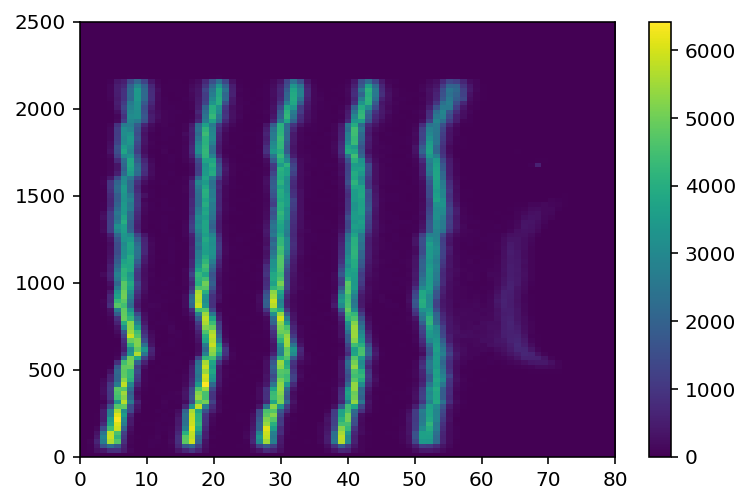

In [37]:
Hist2D(
    np.c_[df["local_x"],df["local_y"]],
    bins=[np.linspace(0,80,80),np.linspace(0,2500,100)]
      ).plot()

In [47]:
# df.sort_values("vehicle_id")[["vehicle_id","frame_id","total_frames"]]
df.query("frame_id==123")

,vehicle_id,frame_id,total_frames,global_time,local_x,local_y,global_x,global_y,v_length,v_width,...,d_zone,int_id,section_id,direction,movement,preceding,following,space_headway,time_headway,location
index,,,,,,,,,,,,,,,,,,,,,
113524,53,123,304,1118846991200,53.639,76.114,6451137.214,1873289.817,16.0,5.9,...,-1,-1,-1,-1,-1,48,0,79.64,2.27,3
114131,35,123,280,1118846991200,52.429,183.182,6451212.119,1873210.984,12.0,5.0,...,-1,-1,-1,-1,-1,31,48,63.30,1.97,3
242804,32,123,438,1118846991200,16.724,214.923,6451259.855,1873212.743,16.5,5.9,...,-1,-1,-1,-1,-1,26,0,47.36,1.35,3
140385,2,123,437,1118846991200,17.936,489.167,6451458.729,1873022.375,14.5,4.9,...,-1,-1,-1,-1,-1,0,13,0.00,0.00,3
53146,43,123,458,1118846991200,4.204,74.368,6451172.819,1873324.156,15.5,5.9,...,-1,-1,-1,-1,-1,39,0,55.64,1.39,3
8488,14,123,800,1118848769300,5.638,238.158,6451259.919,1873228.711,15.5,5.9,...,-1,-1,-1,-1,-1,11,24,50.19,3.58,3
18558,39,123,450,1118846991200,2.276,130.004,6451211.937,1873284.479,17.5,4.4,...,-1,-1,-1,-1,-1,27,43,38.71,0.96,3
115467,10,123,436,1118846991200,5.164,373.761,6451382.508,1873109.988,17.0,6.9,...,-1,-1,-1,-1,-1,0,12,0.00,0.00,3
86036,12,123,443,1118846991200,5.666,312.736,6451337.816,1873151.736,14.5,5.9,...,-1,-1,-1,-1,-1,10,23,61.02,1.36,3


In [57]:
from ipywidgets import interact

@interact
def f(fid=1123):
    fig, ax = plt.subplots()
    df.query("frame_id==@fid").plot.scatter(x="local_x",y="local_y",ax=ax)

interactive(children=(IntSlider(value=1123, description='fid', max=3369, min=-1123), Output()), _dom_classes=(…

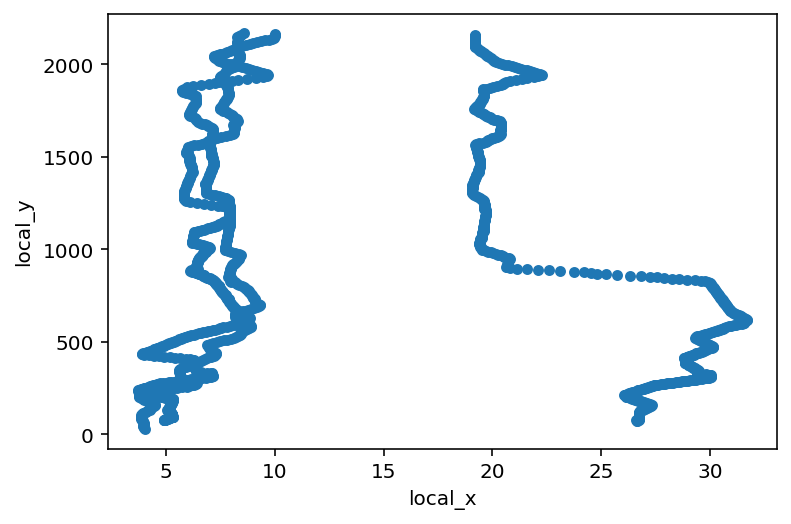

In [61]:

df.query("vehicle_id==12").plot.scatter(x="local_x",y="local_y")

In [62]:
df.sort_values("global_time")

,vehicle_id,frame_id,total_frames,global_time,local_x,local_y,global_x,global_y,v_length,v_width,...,d_zone,int_id,section_id,direction,movement,preceding,following,space_headway,time_headway,location
index,,,,,,,,,,,,,,,,,,,,,
242811,5,8,452,1118846979700,39.788,39.154,6451122.815,1873326.569,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
55681,5,9,452,1118846979800,39.767,43.153,6451125.503,1873323.608,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
158540,5,10,452,1118846979900,39.747,47.154,6451128.192,1873320.646,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
209431,5,11,452,1118846980000,39.726,51.154,6451130.881,1873317.684,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
27481,5,12,452,1118846980100,39.705,55.153,6451133.569,1873314.723,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
169833,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
157723,5,13,452,1118846980200,39.685,59.154,6451136.258,1873311.761,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
78536,5,14,452,1118846980300,39.665,63.154,6451138.946,1873308.799,17.0,7.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3
9655,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,...,-1,-1,-1,-1,-1,0,0,0.00,0.00,3


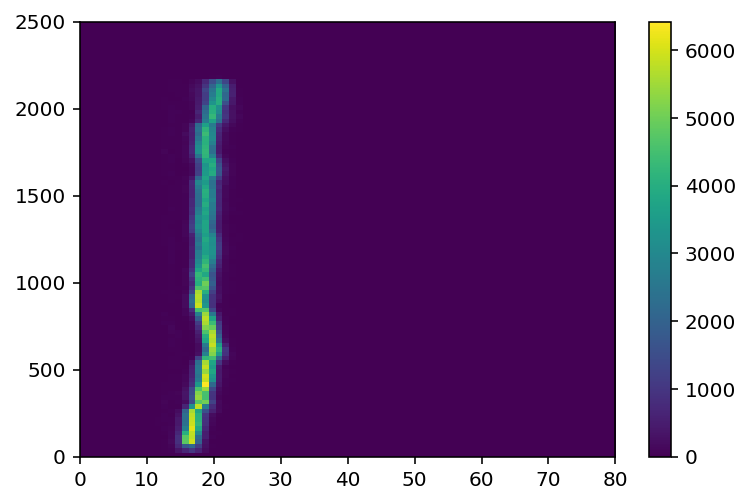

In [71]:
sel = df["lane_id"]==2
Hist2D(
    np.c_[df["local_x"][sel],df["local_y"][sel]],
    bins=[np.linspace(0,80,80),np.linspace(0,2500,100)]
      ).plot()

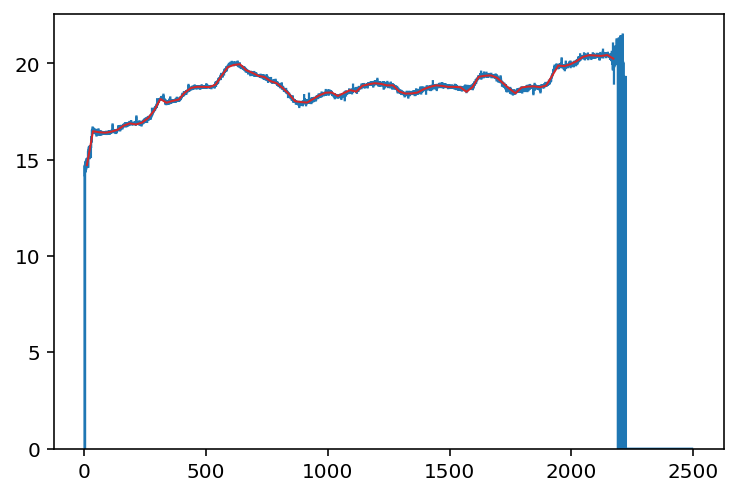

In [148]:
h = Hist2D(
    np.c_[df["local_x"][sel],df["local_y"][sel]],
    bins=[np.linspace(0,40,400),np.linspace(0,2501,2502)]
      ).y_profile()

f = interp1d(h.bin_centers, h.counts,fill_value="extrapolate",bounds_error=False)

fig, ax = plt.subplots()
h.plot(ax=ax,histtype="step")


# x = np.linspace(10,2500-1,100)
# y = f(x)
# print(y)
# ax.plot(x,y,color="C2")
#       )

x = np.linspace(10,2500,100)
y = f(x)
# fig, ax = plt.subplots()
ax.plot(x,y,color="C3",linewidth=1)

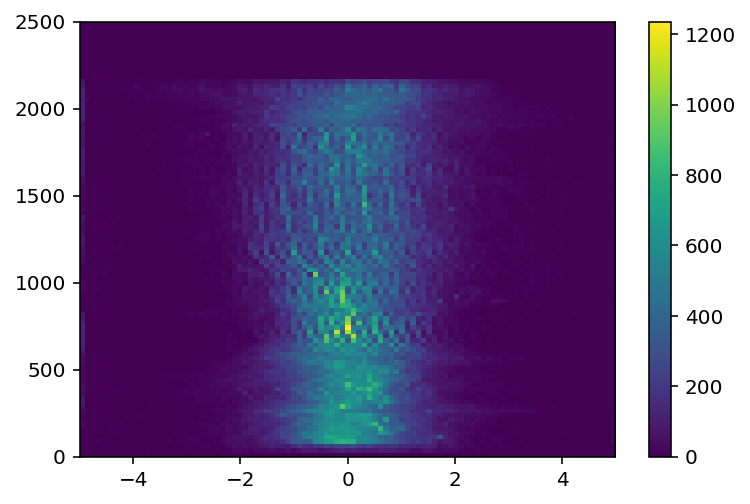

In [150]:
sel = df["lane_id"]==2
h = Hist2D(
    np.c_[
        df["local_x"][sel]-f(df["local_y"][sel]),
        df["local_y"][sel],
         ],
#     bins=[np.linspace(0,80,80),np.linspace(0,2500,100)]
    bins=[np.linspace(-5,5,100),np.linspace(0,2500,100)]
      )
h.plot()

In [151]:
h

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   3.000 ± 1.732   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   4.000 ± 2.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]